In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
# Load the data
data = 'C:\\Users\Vannycoco\\iCloudDrive\State Farm\\homeowner_quotes.xlsx'
df = pd.read_excel(data)

<>:2: SyntaxWarning: invalid escape sequence '\V'
<>:2: SyntaxWarning: invalid escape sequence '\V'
C:\Users\Vannycoco\AppData\Local\Temp\ipykernel_7532\356281240.py:2: SyntaxWarning: invalid escape sequence '\V'
  data = 'C:\\Users\Vannycoco\\iCloudDrive\State Farm\\homeowner_quotes.xlsx'


DATA INSPECTION

In [3]:
# data inspection
print(df.head())
print(df.describe())

   Month  Year  Home Purchase Year  Home/Auto Discount  Amount of Insurance  \
0     11  2018                2018                   1               135000   
1     11  2018                2019                   1               315000   
2     11  2018                2015                   1               415000   
3     11  2018                2018                   1               104000   
4     11  2018                2014                   1               381000   

  First Point of Contact  Written Indicator  Score  Homeowner Age  \
0                  Agent                  1  767.0             20   
1               Internet                  1  617.0             51   
2                  Agent                  0  447.0             63   
3                  Agent                  0  630.0             25   
4                  Agent                  1  668.0             47   

       Aggregator  
0  Non Aggregator  
1  Non Aggregator  
2  Non Aggregator  
3  Non Aggregator  
4      Agg

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173501 entries, 0 to 173500
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Month                   173501 non-null  int64  
 1   Year                    173501 non-null  int64  
 2   Home Purchase Year      173501 non-null  int64  
 3   Home/Auto Discount      173501 non-null  int64  
 4   Amount of Insurance     173501 non-null  int64  
 5   First Point of Contact  173501 non-null  object 
 6   Written Indicator       173501 non-null  int64  
 7   Score                   166166 non-null  float64
 8   Homeowner Age           173501 non-null  int64  
 9   Aggregator              173501 non-null  object 
dtypes: float64(1), int64(7), object(2)
memory usage: 13.2+ MB
None


In [5]:
# checking for missing values
print(df.isnull().sum())

Month                        0
Year                         0
Home Purchase Year           0
Home/Auto Discount           0
Amount of Insurance          0
First Point of Contact       0
Written Indicator            0
Score                     7335
Homeowner Age                0
Aggregator                   0
dtype: int64


In [6]:
#dropping null values 
df_cleaned = df.dropna()
print(df_cleaned.isnull().sum())

Month                     0
Year                      0
Home Purchase Year        0
Home/Auto Discount        0
Amount of Insurance       0
First Point of Contact    0
Written Indicator         0
Score                     0
Homeowner Age             0
Aggregator                0
dtype: int64


DATA CLEANUP 

In [7]:
# Convert columns to appropriate data types
df_cleaned['Month'] = pd.to_numeric(df_cleaned['Month'], errors='coerce')
df_cleaned['Year'] = pd.to_numeric(df_cleaned['Year'], errors='coerce')
df_cleaned['Home Purchase Year'] = pd.to_numeric(df_cleaned['Home Purchase Year'], errors='coerce')
df_cleaned['Aggregator'] = df_cleaned['Aggregator'].astype('category')
df_cleaned['First Point of Contact'] = df_cleaned['First Point of Contact'].astype('category')
df_cleaned['Score'] = df_cleaned['Score'].astype(int)
df_cleaned['Homeowner Age'] = pd.to_numeric(df_cleaned['Homeowner Age'], errors='coerce')

#create a new column in df_cleaned called Season
df_cleaned['Season'] = df_cleaned['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')
df_cleaned.head()

# Verify data types
print(df_cleaned.dtypes)
print(df_cleaned.head())

Month                        int64
Year                         int64
Home Purchase Year           int64
Home/Auto Discount           int64
Amount of Insurance          int64
First Point of Contact    category
Written Indicator            int64
Score                        int64
Homeowner Age                int64
Aggregator                category
Season                      object
dtype: object
   Month  Year  Home Purchase Year  Home/Auto Discount  Amount of Insurance  \
0     11  2018                2018                   1               135000   
1     11  2018                2019                   1               315000   
2     11  2018                2015                   1               415000   
3     11  2018                2018                   1               104000   
4     11  2018                2014                   1               381000   

  First Point of Contact  Written Indicator  Score  Homeowner Age  \
0                  Agent                  1    767       

C:\Users\Vannycoco\AppData\Local\Temp\ipykernel_7532\3117109774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = pd.to_numeric(df_cleaned['Month'], errors='coerce')
C:\Users\Vannycoco\AppData\Local\Temp\ipykernel_7532\3117109774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = pd.to_numeric(df_cleaned['Year'], errors='coerce')
C:\Users\Vannycoco\AppData\Local\Temp\ipykernel_7532\3117109774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [13]:
# Handle outliers in Homeowner Age
Q1 = df_cleaned['Homeowner Age'].quantile(0.25)
Q3 = df_cleaned['Homeowner Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_no_outliers = df_cleaned[(df_cleaned['Homeowner Age'] >= lower_bound) & 
                                (df_cleaned['Homeowner Age'] <= upper_bound)]

In [15]:
# cutoff year for filtering
cutoff_year = 1990
data_filtered = data_no_outliers[data_no_outliers['Home Purchase Year'] > cutoff_year]

# Print filtered data sample to verify
print(data_filtered.head())

   Month  Year  Home Purchase Year  Home/Auto Discount  Amount of Insurance  \
0     11  2018                2018                   1               135000   
1     11  2018                2019                   1               315000   
2     11  2018                2015                   1               415000   
3     11  2018                2018                   1               104000   
4     11  2018                2014                   1               381000   

  First Point of Contact  Written Indicator  Score  Homeowner Age  \
0                  Agent                  1    767             20   
1               Internet                  1    617             51   
2                  Agent                  0    447             63   
3                  Agent                  0    630             25   
4                  Agent                  1    668             47   

       Aggregator Season  
0  Non Aggregator   Fall  
1  Non Aggregator   Fall  
2  Non Aggregator   Fall  
3 

EDA - Exploratory Data Analysis 

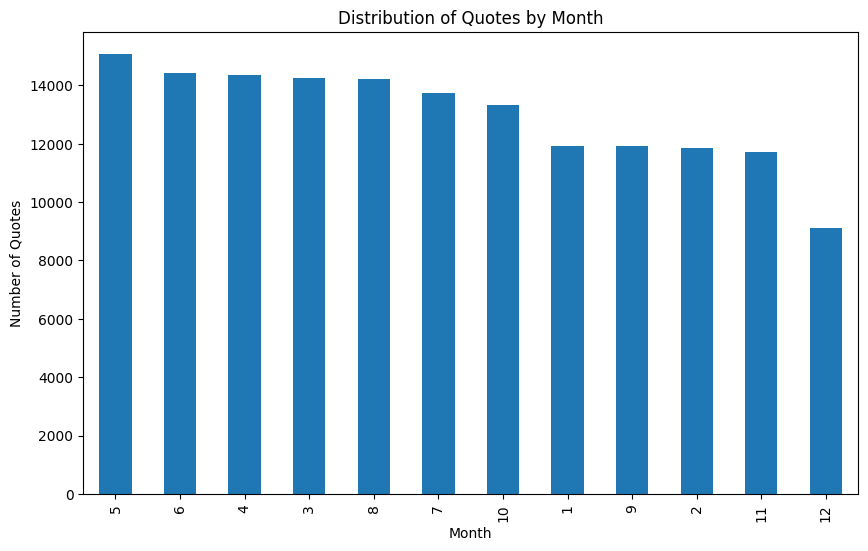

In [16]:
# Distribution of quotes of month
plt.figure(figsize=(10, 6))
data_filtered['Month'].value_counts().plot(kind='bar')
plt.title('Distribution of Quotes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Quotes')
plt.show()

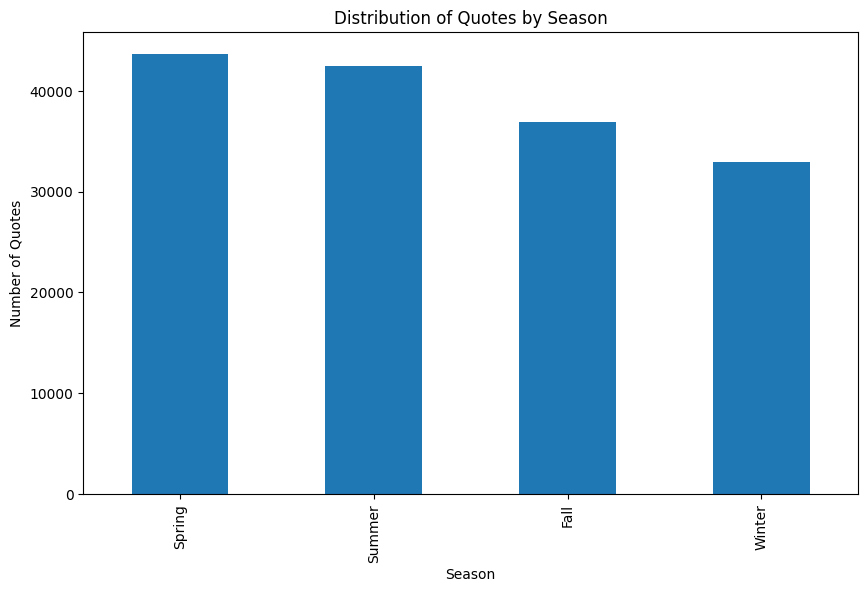

In [17]:
#distribution of quotes by season
plt.figure(figsize=(10, 6))
data_filtered['Season'].value_counts().plot(kind='bar')
plt.title('Distribution of Quotes by Season')
plt.xlabel('Season')
plt.ylabel('Number of Quotes')
plt.show()

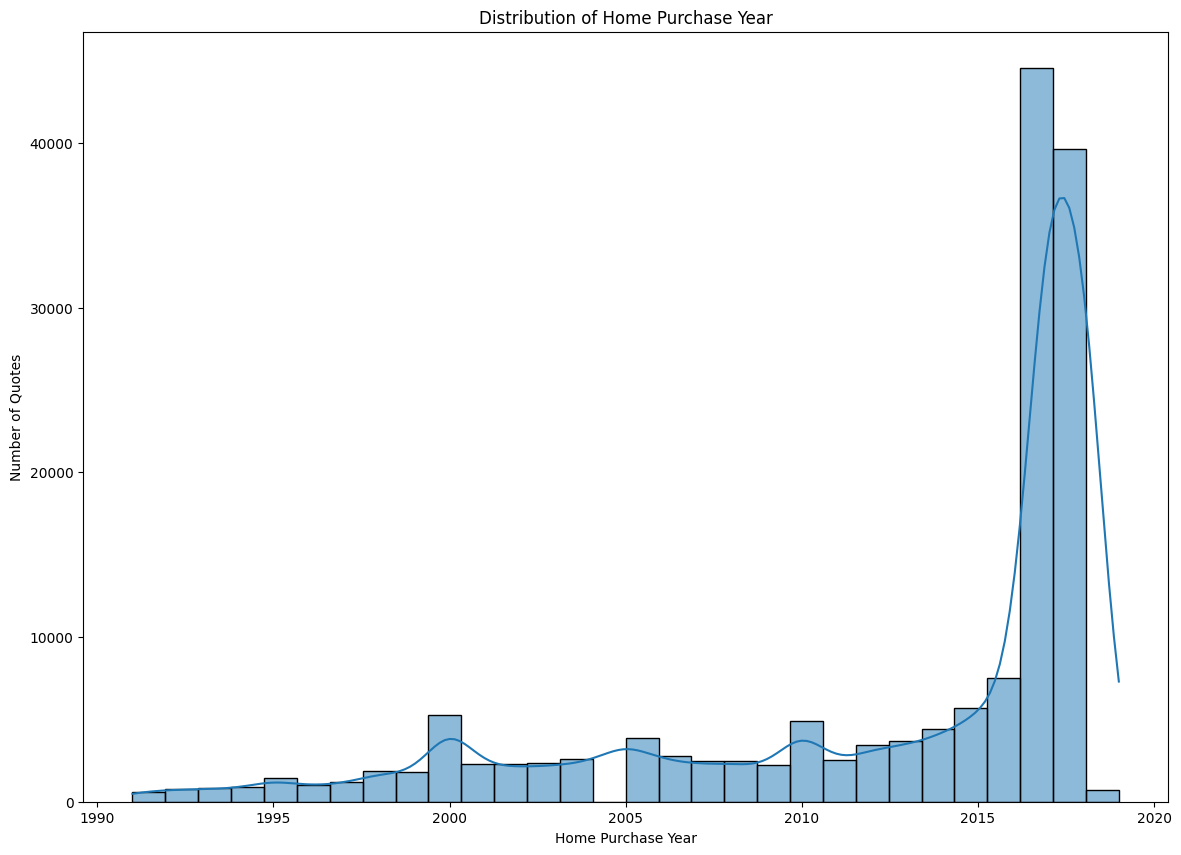

In [18]:
# Visualize the distribution of Home Purchase Year
plt.figure(figsize=(14, 10))
sns.histplot(data_filtered['Home Purchase Year'], bins=30, kde=True)
plt.title('Distribution of Home Purchase Year')
plt.xlabel('Home Purchase Year')
plt.ylabel('Number of Quotes')
plt.show()

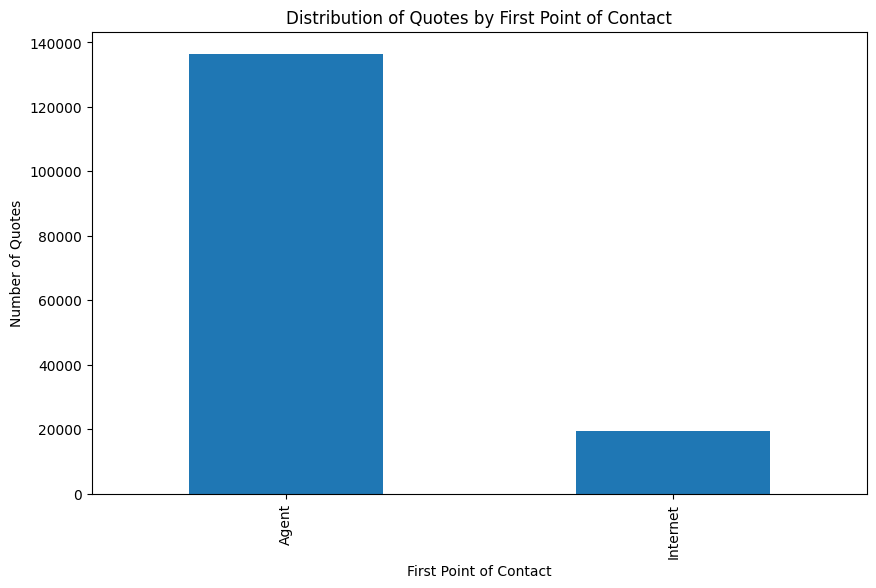

In [19]:
#distribution of quotes by first point of contact
plt.figure(figsize=(10, 6))
data_filtered['First Point of Contact'].value_counts().plot(kind='bar')
plt.title('Distribution of Quotes by First Point of Contact')
plt.xlabel('First Point of Contact')
plt.ylabel('Number of Quotes')
plt.show()

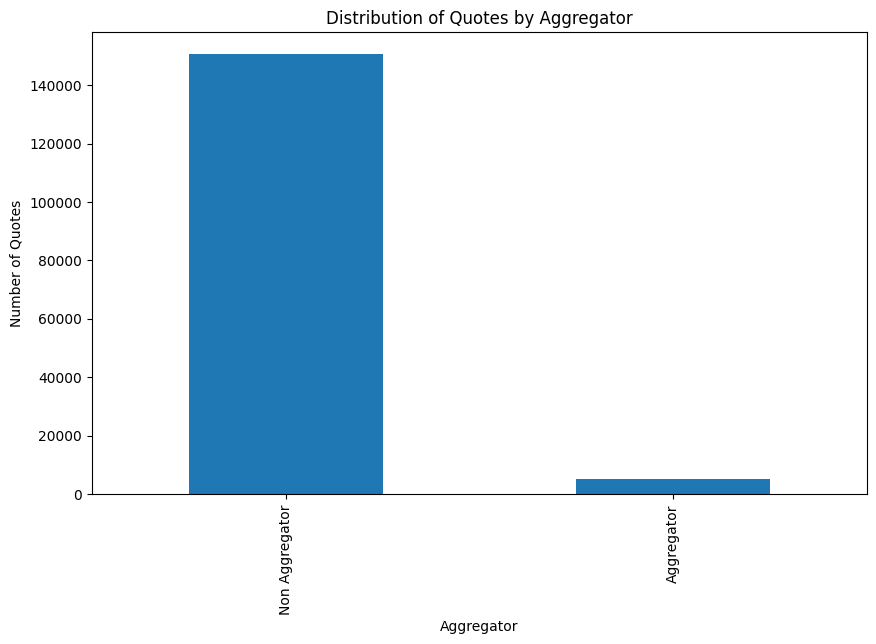

In [20]:
#check for distribution of quotes by aggregator
plt.figure(figsize=(10, 6))
data_filtered['Aggregator'].value_counts().plot(kind='bar')
plt.title('Distribution of Quotes by Aggregator')
plt.xlabel('Aggregator')
plt.ylabel('Number of Quotes')
plt.show()

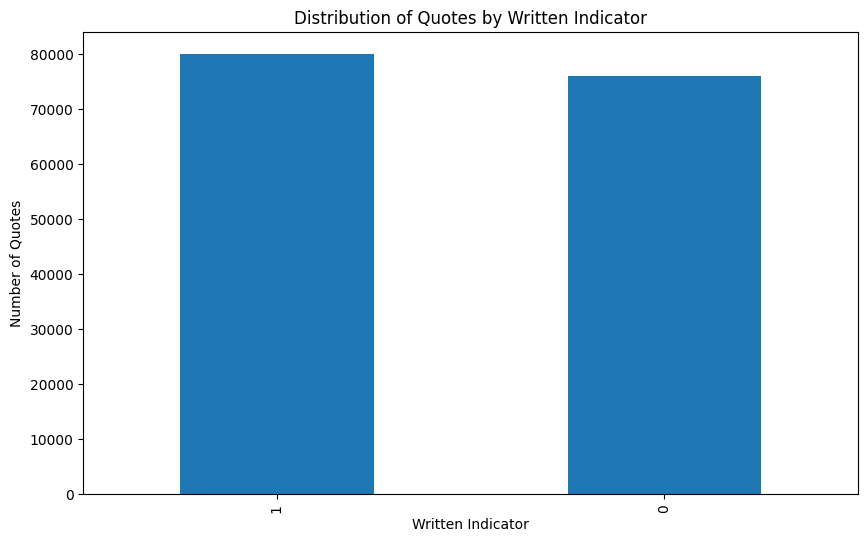

In [21]:
#distribution of quotes by written indicator
plt.figure(figsize=(10, 6))
data_filtered['Written Indicator'].value_counts().plot(kind='bar')
plt.title('Distribution of Quotes by Written Indicator')
plt.xlabel('Written Indicator')
plt.ylabel('Number of Quotes')
plt.show()

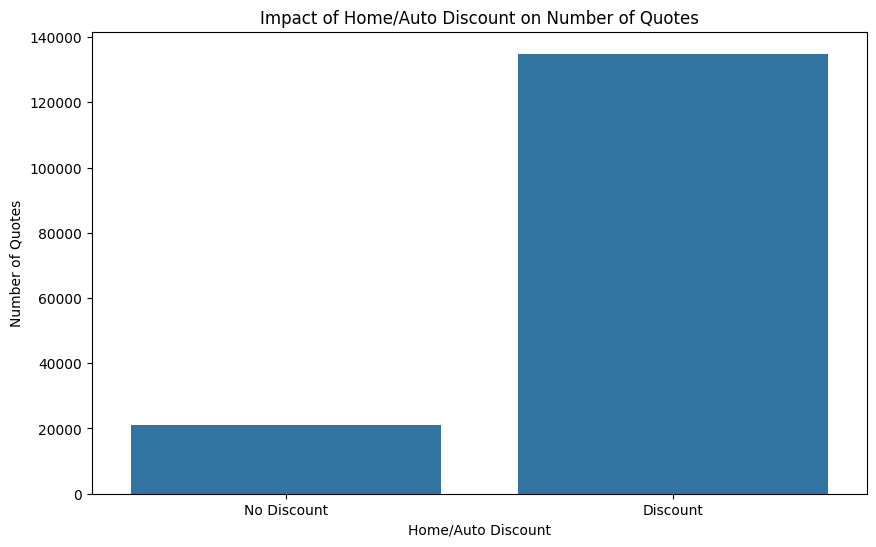

In [52]:
# Group data by Home/Auto Discount and count the number of quotes
discount_data = data_filtered.groupby(['Home/Auto Discount']).size().reset_index(name='Quote_Count')

# Create a bar plot for Home/Auto Discount
plt.figure(figsize=(10, 6))
sns.barplot(x='Home/Auto Discount', y='Quote_Count', data=discount_data)
plt.title('Impact of Home/Auto Discount on Number of Quotes')
plt.xlabel('Home/Auto Discount')
plt.ylabel('Number of Quotes')
plt.xticks([0, 1], ['No Discount', 'Discount'])
plt.show()

DATA ANALYSIS - Seasonal Trends

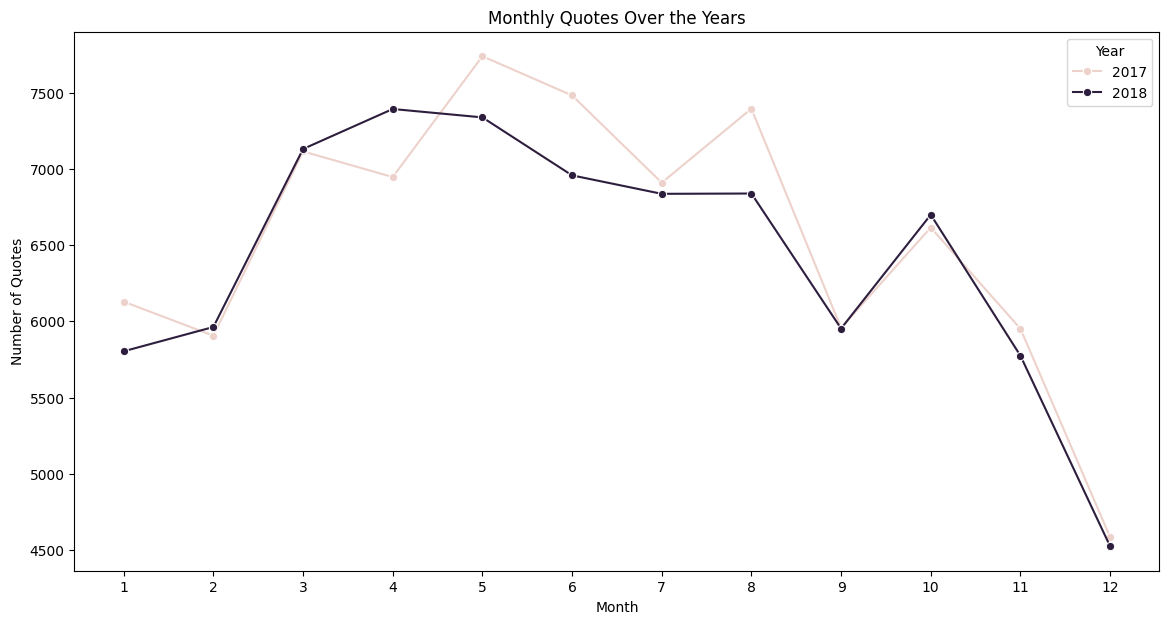

In [22]:
# Group data by Month and Year
monthly_data = data_filtered.groupby(['Year', 'Month']).size().reset_index(name='Quote_Count')


plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_data, x='Month', y='Quote_Count', hue='Year', marker='o')
plt.title('Monthly Quotes Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of Quotes')
plt.xticks(range(1, 13))
plt.show()

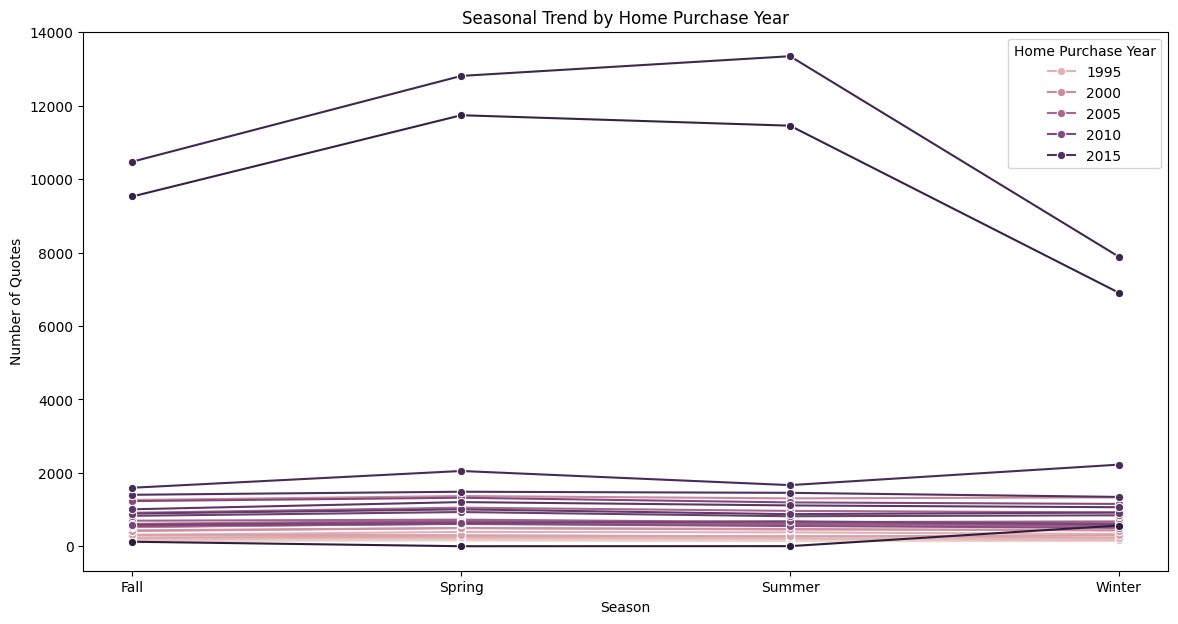

In [23]:
# seasonal trend by home purchase year

purchase_year_data = data_filtered.groupby(['Home Purchase Year', 'Season']).size().reset_index(name='Quote_Count')

plt.figure(figsize=(14, 7))
sns.lineplot(data=purchase_year_data, x='Season', y='Quote_Count', hue='Home Purchase Year', marker='o')
plt.title('Seasonal Trend by Home Purchase Year')
plt.xlabel('Season')
plt.ylabel('Number of Quotes')
plt.show()

C:\Users\Vannycoco\AppData\Local\Temp\ipykernel_7532\4044618462.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contact_data = data_filtered.groupby(['Month', 'First Point of Contact']).size().reset_index(name='Quote_Count')


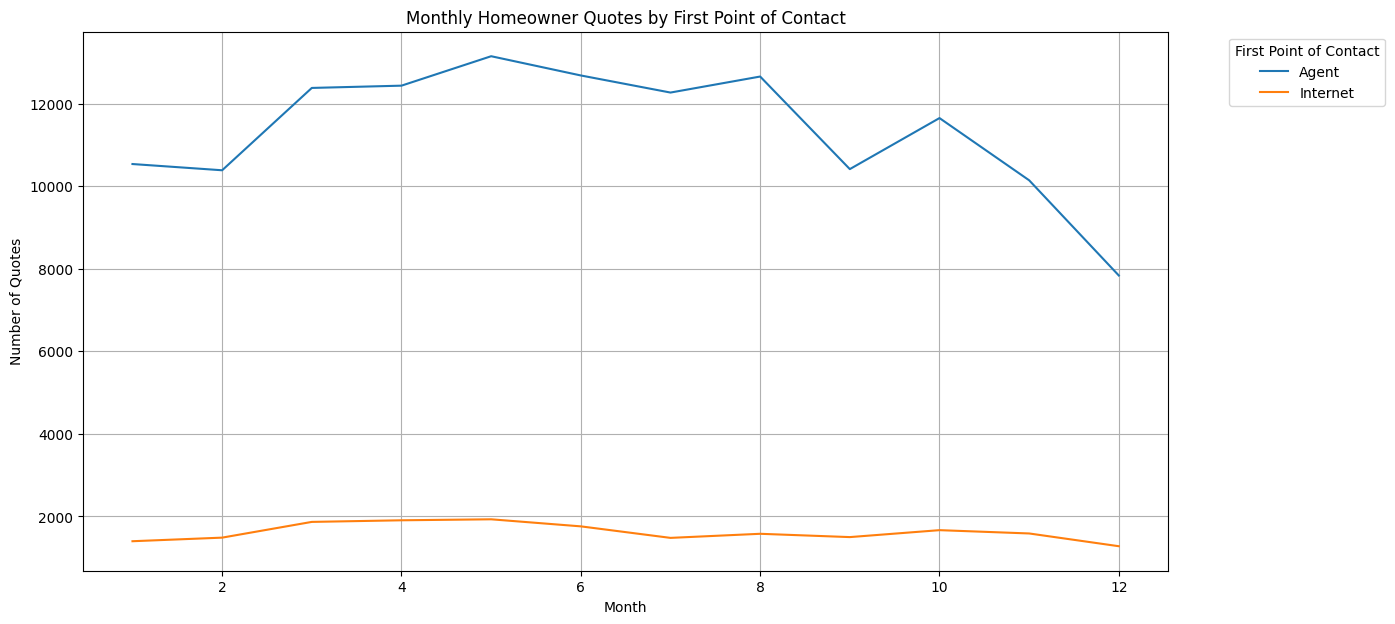

In [24]:
# impact of first point of contact on quotes
contact_data = data_filtered.groupby(['Month', 'First Point of Contact']).size().reset_index(name='Quote_Count')

plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Quote_Count', hue='First Point of Contact', data=contact_data)
plt.title('Monthly Homeowner Quotes by First Point of Contact')
plt.xlabel('Month')
plt.ylabel('Number of Quotes')
plt.legend(title='First Point of Contact', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

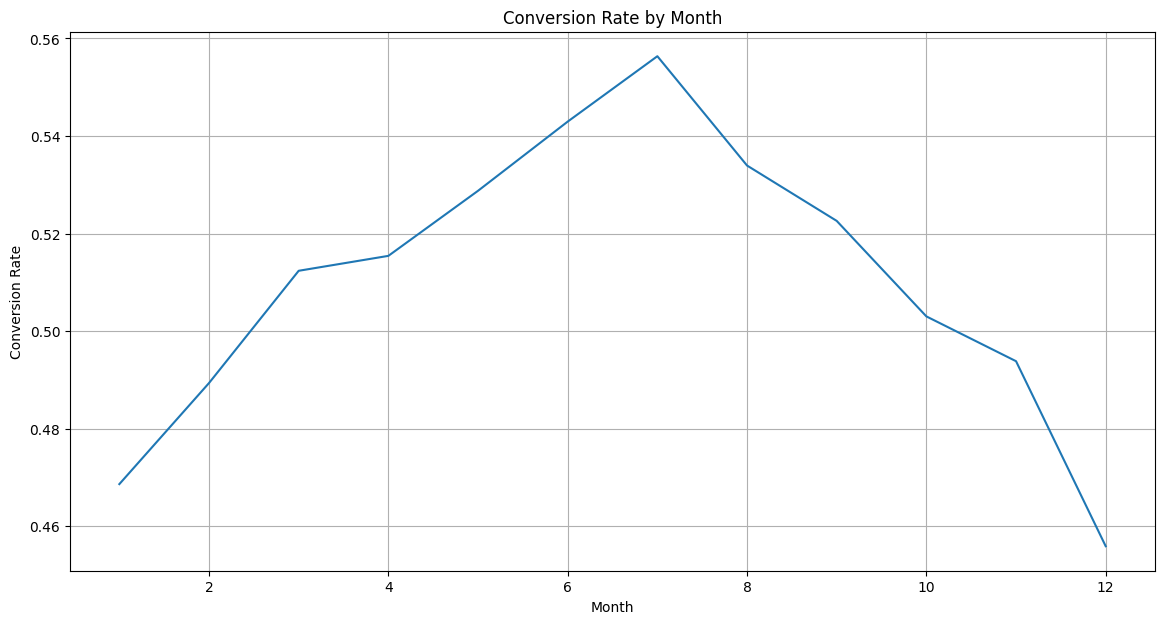

In [25]:
# conversion rate by month 

conversion_data = data_filtered.groupby(['Month'])['Written Indicator'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Written Indicator', data=conversion_data)
plt.title('Conversion Rate by Month')
plt.xlabel('Month')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()

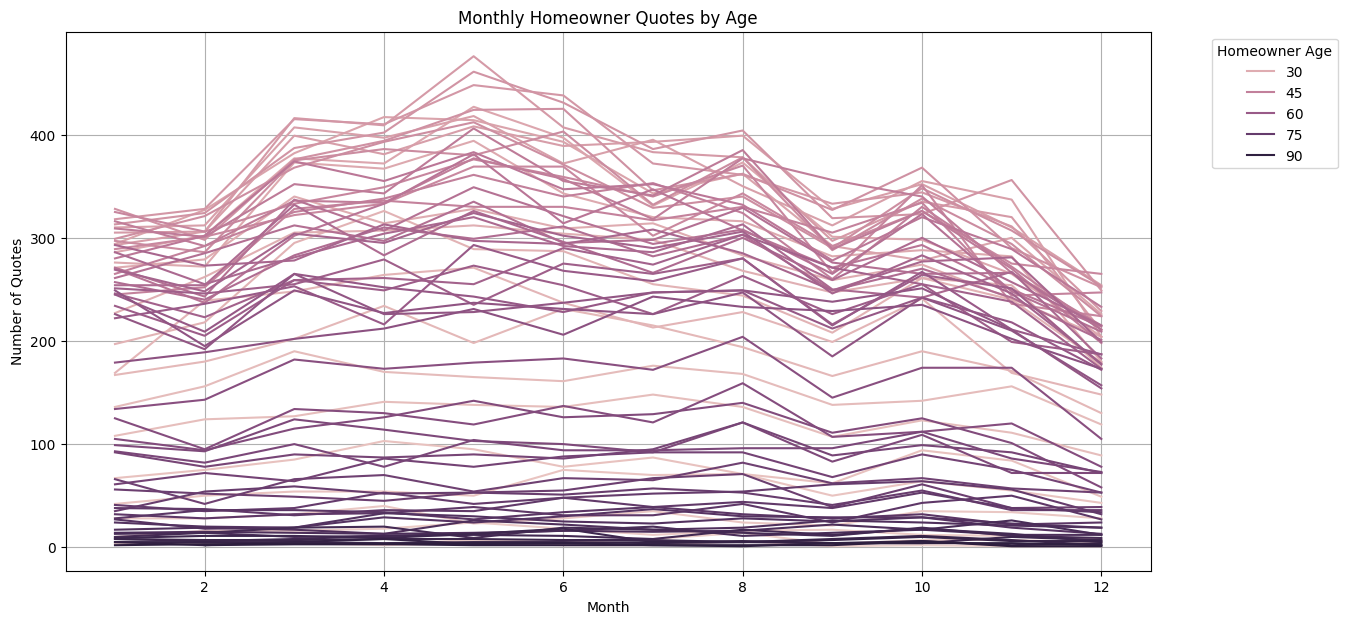

In [26]:
#homeowner age seasonal trend

age_data = data_filtered.groupby(['Month', 'Homeowner Age']).size().reset_index(name='Quote_Count')

plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Quote_Count', hue='Homeowner Age', data=age_data)
plt.title('Monthly Homeowner Quotes by Age')
plt.xlabel('Month')
plt.ylabel('Number of Quotes')
plt.legend(title='Homeowner Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

STATISTICAL ANALYSIS - Correlation Analysis

In [27]:
#numeric values 
numeric_data = data_filtered.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                        Month      Year  Home Purchase Year  \
Month                1.000000 -0.001469            0.024638   
Year                -0.001469  1.000000            0.065528   
Home Purchase Year   0.024638  0.065528            1.000000   
Home/Auto Discount  -0.017951 -0.048774           -0.070244   
Amount of Insurance  0.007052  0.029598            0.012128   
Written Indicator    0.000944 -0.035767            0.225946   
Score                0.003206  0.012660            0.016352   
Homeowner Age        0.015626  0.000017           -0.435931   

                     Home/Auto Discount  Amount of Insurance  \
Month                         -0.017951             0.007052   
Year                          -0.048774             0.029598   
Home Purchase Year            -0.070244             0.012128   
Home/Auto Discount             1.000000             0.020807   
Amount of Insurance            0.020807             1.000000   
Written Indicator              0.173542         

HYPOTHESIS TESTING - Chi-Square Test

In [46]:
from scipy.stats import chi2_contingency

# Chi-Square Test (Month & Written Indicator)
contingency_table_month = pd.crosstab(data_filtered['Month'], data_filtered['Written Indicator'])
chi2, p, dof, ex = chi2_contingency(contingency_table_month)
print(f'Chi-square test Month & Written Indicator p-value: {p}')

Chi-square test Month & Written Indicator p-value: 3.733775479651647e-92


In [47]:
# Chi-Square Test for Home/Auto Discount and Written Indicator
contingency_table_discount_written = pd.crosstab(data_filtered['Home/Auto Discount'], data_filtered['Written Indicator'])
chi2_discount_written, p_discount_written, dof_discount_written, ex_discount_written = chi2_contingency(contingency_table_discount_written)
print(f'Chi-square test for Home/Auto Discount and Written Indicator p-value: {p_discount_written}')


Chi-square test for Home/Auto Discount and Written Indicator p-value: 0.0


In [48]:
# Chi-Square Test for First Point of Contact and Written Indicator
contingency_table_contact_written = pd.crosstab(data_filtered['First Point of Contact'], data_filtered['Written Indicator'])
chi2_contact_written, p_contact_written, dof_contact_written, ex_contact_written = chi2_contingency(contingency_table_contact_written)
print(f'Chi-square test for First Point of Contact and Written Indicator p-value: {p_contact_written}')


Chi-square test for First Point of Contact and Written Indicator p-value: 0.0


In [49]:
# Chi-Square Test for Aggregator and Written Indicator
contingency_table_aggregator_written = pd.crosstab(data_filtered['Aggregator'], data_filtered['Written Indicator'])
chi2_aggregator_written, p_aggregator_written, dof_aggregator_written, ex_aggregator_written = chi2_contingency(contingency_table_aggregator_written)
print(f'Chi-square test for Aggregator and Written Indicator p-value: {p_aggregator_written}')


Chi-square test for Aggregator and Written Indicator p-value: 1.2504430442017979e-194


In [50]:
# Chi-Square Test for Month and Home/Auto Discount
contingency_table_month_discount = pd.crosstab(data_filtered['Month'], data_filtered['Home/Auto Discount'])
chi2_month_discount, p_month_discount, dof_month_discount, ex_month_discount = chi2_contingency(contingency_table_month_discount)
print(f'Chi-square test for Month and Home/Auto Discount p-value: {p_month_discount}')


Chi-square test for Month and Home/Auto Discount p-value: 1.5263744430848525e-22


In [51]:
# Chi-Square Test for Year and Written Indicator
contingency_table_year_written = pd.crosstab(data_filtered['Year'], data_filtered['Written Indicator'])
chi2_year_written, p_year_written, dof_year_written, ex_year_written = chi2_contingency(contingency_table_year_written)
print(f'Chi-square test for Year and Written Indicator p-value: {p_year_written}')


Chi-square test for Year and Written Indicator p-value: 2.898422189636832e-45
